In [125]:
import pandas as pd
from random import randint
import matplotlib.pyplot as plt

In [126]:
ctrial_f = "./raw_data/clinicaltrial_data.csv"
ctrial_df = pd.read_csv(ctrial_f)
ctrial_df.head()
#len(ctrial_df) #1893
#len(ctrial_df["Mouse ID"].unique()) #249

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [127]:
mdrug_f = "./raw_data/mouse_drug_data.csv"
mdrug_df = pd.read_csv(mdrug_f)
mdrug_df.head()
#len(mdrug_df) #250
#len(mdrug_df["Mouse ID"].unique()) #249

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [128]:
results = pd.merge(ctrial_df, mdrug_df,how="left",on="Mouse ID")
#len(results) #1906 - duplicate mouseID on two drugs
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [129]:
summary = pd.DataFrame(results.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"mean", "Metastatic Sites":"sum", "Mouse ID":"count" }))
summary.reset_index(inplace=True)
summary.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID
0,Capomulin,0,45.000000,0,25
1,Capomulin,5,44.266086,4,25
2,Capomulin,10,43.084291,8,25
3,Capomulin,15,42.064317,9,24
4,Capomulin,20,40.716325,15,23


In [130]:
num_drugs = len(summary["Drug"].unique())
num_drugs

10

In [131]:
summary_drug = summary.pivot(columns='Drug', index="Timepoint")
summary_drug.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                    ...     \
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol    ...      
Timepoint                                                           ...      
0          45.000000  45.000000  45.000000  45.000000  45.000000    ...      
5          47.125589  47.248967  43.944859  47.527452  46.851818    ...      
10         49.423329  49.101541  42.531957  49.463844  48.689881    ...      
15         51.359742  51.067318  41.495061  51.529409  50.779059    ...      
20         54.364417  53.346737  40.238325  54.067395  53.170334    ...      

           Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  

[5 rows x 30 columns]

In [132]:
xaxis = summary_drug.index #timepoint

In [133]:
# tumor volume changes over time for each treatment.
tumor = summary_drug["Tumor Volume (mm3)"]
tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [134]:
import colorsys

HSV_tuples = [(x*1.0/num_drugs, 0.5, 0.5) for x in range(num_drugs)]
colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
colors

[(0.5, 0.25, 0.25),
 (0.5, 0.4, 0.25),
 (0.44999999999999996, 0.5, 0.25),
 (0.30000000000000004, 0.5, 0.25),
 (0.25, 0.5, 0.3500000000000001),
 (0.25, 0.5, 0.5),
 (0.25, 0.3500000000000001, 0.5),
 (0.2999999999999998, 0.25, 0.5),
 (0.4500000000000002, 0.25, 0.5),
 (0.5, 0.25, 0.3999999999999999)]

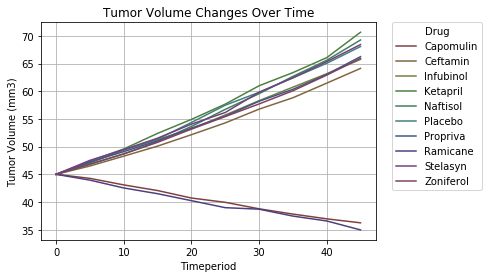

In [135]:
# https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python

for i in range(num_drugs):
    plt.plot(xaxis, tumor.iloc[:,i],color=colors[i])

plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timeperiod')
plt.title('Tumor Volume Changes Over Time')
plt.grid()
plt.show()

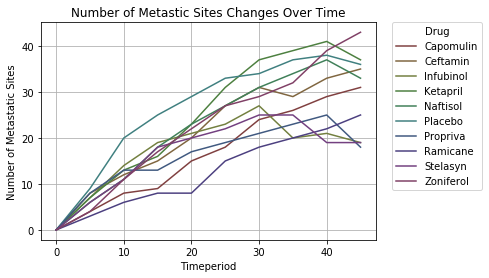

In [136]:
# number of metastatic (cancer spreading) sites changes over time for each treatment.
metastatic = summary_drug["Metastatic Sites"]
#metastatic.head()

for i in range(num_drugs):
    plt.plot(xaxis, metastatic.iloc[:,i],color=colors[i])

plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Number of Metastatic Sites')
plt.xlabel('Timeperiod')
plt.title('Number of Metastic Sites Changes Over Time')
plt.grid()
plt.show()

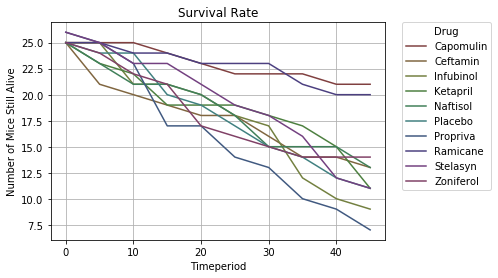

In [137]:
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

survival_rate = summary_drug["Mouse ID"]
survival_rate.head()

for i in range(num_drugs):
    plt.plot(xaxis, survival_rate.iloc[:,i],color=colors[i])

plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Number of Mice Still Alive')
plt.xlabel('Timeperiod')
plt.title('Survival Rate')
plt.grid()
plt.show()

In [ ]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.